In [184]:
import nibabel as nib
import nilearn.image as im
import matplotlib.pyplot as plt
import nibabel.processing as proc
import numpy as np

In [185]:
img1 = nib.load("../data/session_4D 1 decision 1 .nii")
data1 = img1.get_fdata()
img1.shape

(91, 109, 91, 22)

In [186]:
img1.affine

array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [187]:
print("Positive:", np.sum(data1 > 0))
print("Zeros:", np.sum(data1 == 0))
print("Negative:", np.sum(data1 < 0))
print("Maximum:", np.max(data1))
print("Minimum:", np.min(data1))

Positive: 10529278
Zeros: 9325096
Negative: 3464
Maximum: 137558.921875
Minimum: -6657.287109375


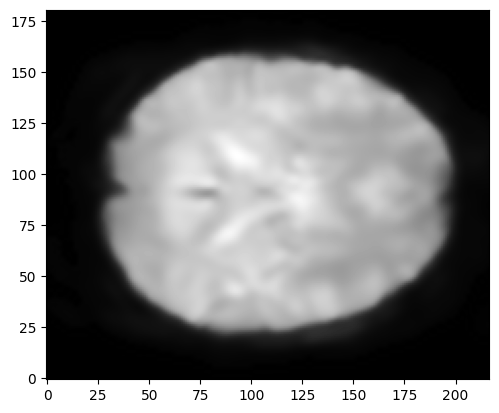

In [119]:
img4 = proc.resample_to_output(im.mean_img(img1), [1,1,1])
data4 = img4.get_fdata()
slice = data4[:, :, 91]
plt.imshow(slice, cmap="gray", origin="lower")

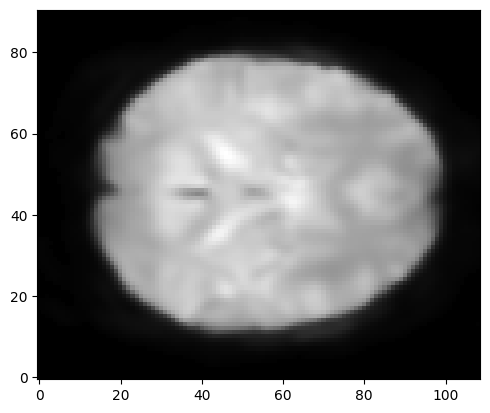

In [175]:
img4 = proc.resample_to_output(im.mean_img(img1), [2,2,2])
data4 = img4.get_fdata()
slice = data4[:, :, 45]
plt.imshow(slice, cmap="gray", origin="lower")

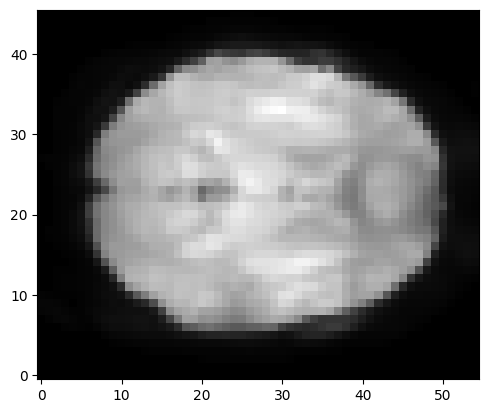

In [173]:
img4 = proc.resample_to_output(im.mean_img(img1), [4,4,4])
data4 = img4.get_fdata()
slice = data4[:, :, 20]
plt.imshow(slice, cmap="gray", origin="lower")

In [121]:
img4.shape

(46, 55, 46)

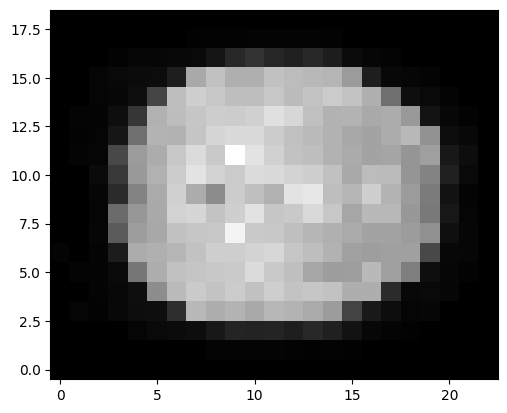

In [216]:
img4 = proc.resample_to_output(im.mean_img(img1), [10,10,10])
data4 = img4.get_fdata()
slice = data4[:, :, 9]
plt.imshow(slice, cmap="gray", origin="lower")

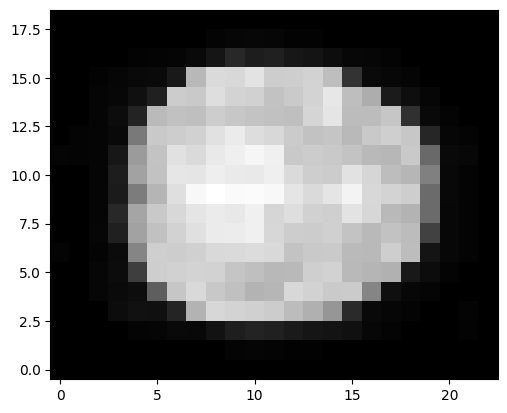

In [219]:
img5 = im.resample_img(img1, target_affine=img4.affine)
data5 = img5.get_fdata()
slice = data5[:, :, 10, 0]
plt.imshow(slice, cmap="gray", origin="lower")

In [210]:
img5.affine

array([[  10.,    0., -110.,  -70.],
       [   0.,   10.,    0., -110.],
       [   0.,    0.,   10.,  -60.],
       [   0.,    0.,    0.,    1.]])

In [166]:
img4.affine


array([[  10.,    0.,    0.,  -90.],
       [   0.,   10.,    0., -126.],
       [   0.,    0.,   10.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [192]:
img4.shape

(19, 23, 19)

In [179]:
data4 = img4.get_fdata()
data4

array([[[ 3.21773744e-27, -1.59748102e-24, -5.31868056e-22, ...,
          1.44047849e-29, -6.48950181e-32,  7.04261928e-35],
        [ 1.39825716e-27,  3.04729600e-25, -1.00136861e-22, ...,
         -1.47730915e-27,  2.38479849e-30,  2.02910173e-33],
        [-8.29630610e-28, -4.15371853e-27, -1.38015510e-25, ...,
         -1.06320515e-24, -3.03489017e-28,  6.31168339e-30],
        ...,
        [ 5.22064407e-34,  1.75715881e-31,  8.13861633e-29, ...,
         -6.36101336e-30,  1.22426652e-31, -2.20926064e-34],
        [ 1.21475849e-36, -3.38396962e-34,  5.11932688e-31, ...,
         -7.07671595e-31,  9.59853831e-34,  2.55328244e-36],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 7.09993429e-24,  8.81639779e-22,  2.54185419e-19, ...,
         -9.29907868e-27, -1.97782211e-29, -7.87204060e-32],
        [ 3.38733141e-25, -2.23184241e-22,  4.39575351e-20, ...,
         -3.10862482e-30,  3.42318443e

In [193]:
print("Positive:", np.sum(data4 > 0))
print("Zeros:", np.sum(data4 == 0))
print("Negative:", np.sum(data4 < 0))
print("Maximum:", np.max(data4))
print("Minimum:", np.min(data4))
print("Mean:", np.mean(data4))
print("Median:", np.median(data4))
print("Bigger then 1:", np.sum(data4 > 1))

Positive: 6039
Zeros: 361
Negative: 1903
Maximum: 131991.6015625
Minimum: -56.283086429942664
Mean: 19064.243200266057
Median: 1.0734408884842454e-13
Bigger then 1: 3870


In [194]:
import numpy.linalg as npl
npl.inv(img4.affine).dot([0,0,0,1])

array([ 9. , 12.6,  7.2,  1. ])

In [224]:
data5[5,5,5,:]

array([66600.296875 , 65559.8828125, 67010.1875   , 66390.9375   ,
       66314.03125  , 66965.46875  , 67503.8515625, 66249.796875 ,
       66994.859375 , 67046.09375  , 66974.1953125, 66428.5703125,
       66406.484375 , 65620.4140625, 65281.0078125, 65594.2265625,
       66298.5546875, 66997.359375 , 65950.5390625, 65757.28125  ,
       66723.9765625, 66284.2734375])

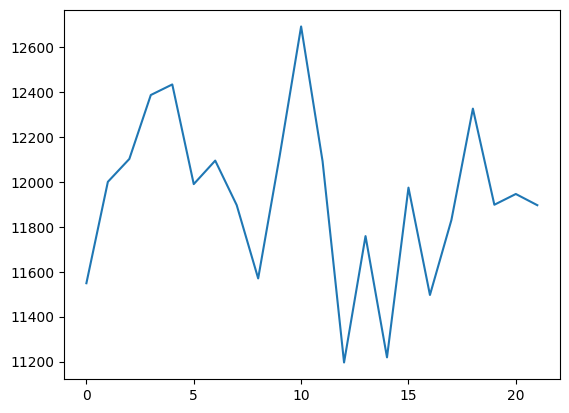

In [251]:
plt.plot([i for i in range(len(data5[4,5,5,:]))], data5[4,5,5,:])
plt.show()

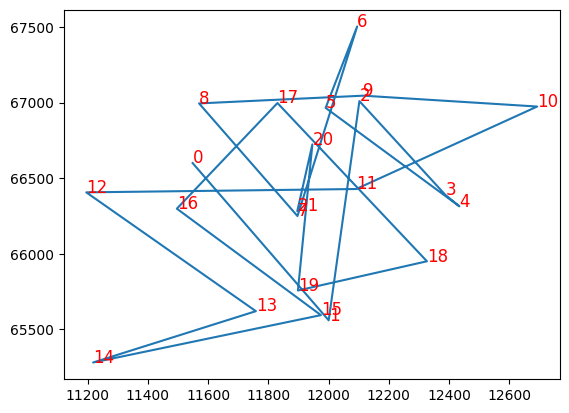

In [236]:
xd, yd = data5[4,5,5,:], data5[5,5,5,:]
td = [i for i in range(len(xd))]
plt.plot(xd, yd)
for x, y, t in zip(xd, yd, td):
    plt.text(x, y, str(t), color="red", fontsize=12)
plt.show()

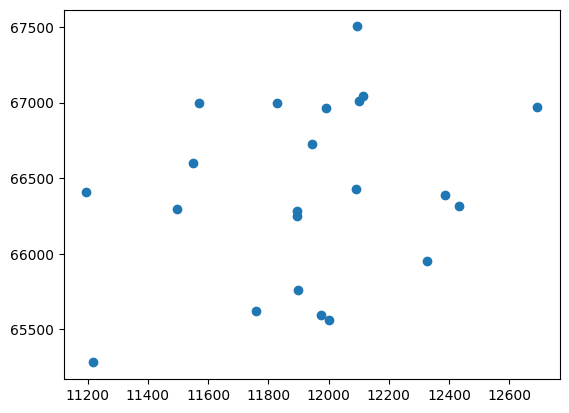

In [246]:
xd, yd = data5[4,5,5,:], data5[5,5,5,:]
td = [i for i in range(len(xd))]
plt.scatter(xd, yd)
# for x, y, t in zip(xd, yd, td):
#     plt.text(x, y, str(t), color="red", fontsize=12)
plt.show()

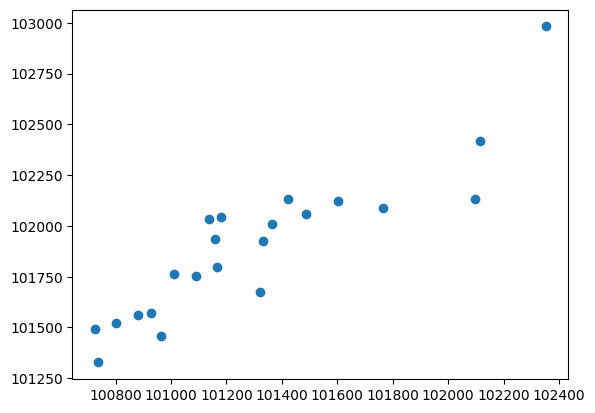

In [249]:
xd, yd = data1[44,45,45,:], data1[45,45,45,:]
td = [i for i in range(len(xd))]
plt.scatter(xd, yd)
plt.show()

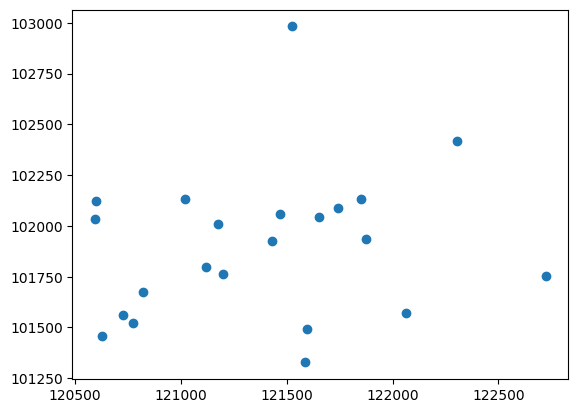

In [250]:
xd, yd = data1[35,45,45,:], data1[45,45,45,:]
td = [i for i in range(len(xd))]
plt.scatter(xd, yd)
plt.show()

In [254]:
img = nib.load("../data/derivatives_preproc-spm_output_sub-01_ses-perceptionTest01_func_sub-01_ses-perceptionTest01_task-perception_run-01_bold_preproc.nii.gz")
data = img.get_fdata()
slice = data[:,:,25,0]
img.shape

(64, 64, 50, 175)

In [256]:
img.affine

array([[ -3. ,   0. ,   0. ,  94.5],
       [  0. ,   3. ,   0. , -94.5],
       [  0. ,   0. ,   3. , -73.5],
       [  0. ,   0. ,   0. ,   1. ]])

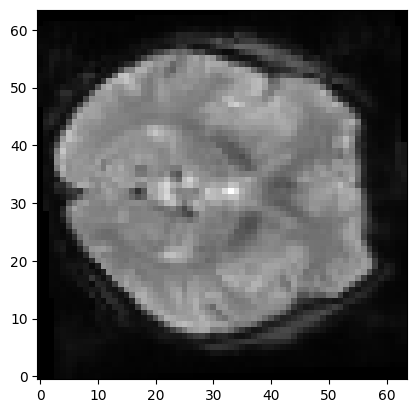

In [255]:
plt.imshow(slice, cmap="gray", origin="lower")

In [260]:
normal_affine = img.affine
normal_affine[0][0] *= -1
normal_affine[0][3] *= -1
norma_image = im.resample_img(img, target_affine=normal_affine)

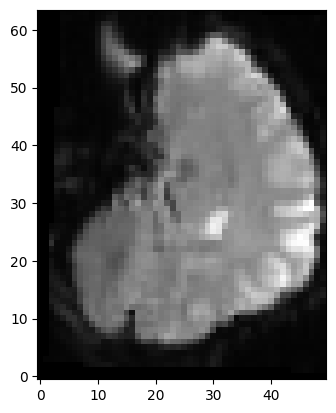

In [264]:
data = norma_image.get_fdata()
slice = data[25,:,:,0]
plt.imshow(slice, cmap="gray", origin="lower")

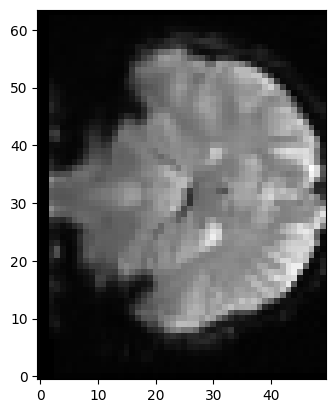

In [265]:
slice = data[:,25,:,0]
plt.imshow(slice, cmap="gray", origin="lower")

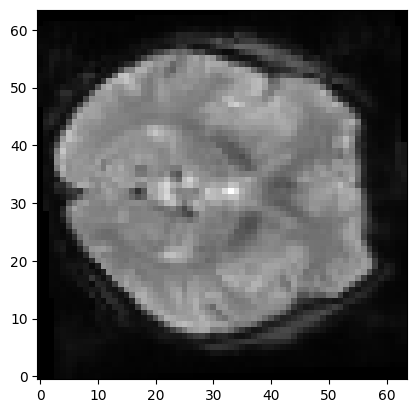

In [266]:
slice = data[:,:,25,0]
plt.imshow(slice, cmap="gray", origin="lower")